# CaptureDOM Analyzer
Capture DOM analyzer viene utilizzato per confrontare diversi tool che effettuano detection di vulnerabilità XSS, di seguito è presente un elenco dei tool utilizzati:

- [**xsser**](https://xsser.03c8.net/)
- [**XSSstrike**](https://github.com/s0md3v/XSStrike)
- [**XSS scanner**](https://github.com/MariaGarber/XSS-Scanner)
- [**XSpear**](https://github.com/hahwul/XSpear)
- [**dsxs**](https://github.com/stamparm/DSXS)
- [**XSSsniper**](https://github.com/gbrindisi/xsssniper)
- [**PwnXSS**](https://github.com/pwn0sec/PwnXSS)
- [**ChromiumTaintTracking**](https://github.com/wrmelicher/ChromiumTaintTracking)

Le vulnerabilità che i tool possono identificare sono:
- **DOM**
- **REFLECTED**
- **STORED**


Come si può notare dall'elenco precedente ci sono tre categorie per tipo di vulnerabilità. Ogni volta che un tool identifica una vulnerabilità, riceve un voto che varia da 1 a 3 in base alla difficoltà.

Per effettuare un'analisi appropiata sono stati realizzati tre file CSV:
<li><strong>results.csv</strong> per tenere traccia delle vulnerabilità identificate</li>
<li><strong>results_time.csv</strong> per memeorizzare il tempo di esceuzione</li>
<li><strong>results_type.csv</strong> per determinare il tipo di vulnerabilità identificata da ogni tool per ogni livello</li>
</ul>

In [181]:
import pandas as pd

result_csv = pd.read_csv('results.csv', index_col=0)

## Contenuto del file result.csv
In questo file sono presenti tutte le informazioni riguardanti l'identificazione di una vulnerabilità. la prima colonna è avvalorata con i nomi dei tool utilizati e la prima riga con le vulnerabilità presenti all'interno della Capture the Flag. Le celle possono essere avvalorate con tre annotazioni:
<ul>
    <li><strong>Founded</strong>: afferma che la vulnerabilità è stata identificata</li>
    <li><strong>Not founded</strong>: afferma che la vulnerabilità non è stata identificata</li>
    <li><strong>Not determinated</strong>: afferma che il tool non sa cosa rispondere, questa annotazione considera anche il caso in cui un tool va in crash.</li>
</ul>

In [182]:
result_csv.head(10)

DOM low   DOM medium     DOM high REFLECTED low  \
Tool name                                                                    
xsser                  not founded  not founded  not founded       founded   
XSStrike                   founded      founded      founded       founded   
XSS scanner                founded      founded      founded       founded   
XSpear                 not founded  not founded  not founded       founded   
dsxs                   not founded      founded      founded       founded   
sniper                 not founded  not founded  not founded       founded   
PwnXSS                 not founded  not founded  not founded       founded   
ChromiumTaintTracking      founded      founded      founded       founded   

                      REFLECTED medium REFLECTED high   STORED low  \
Tool name                                                            
xsser                      not founded    not founded  not founded   
XSStrike                       founded        founded  not founded   
XSS scanner                    founded        founded      founded   
XSpear                         founded        founded  not founded   
dsxs                           founded        founded  not founded   
sniper                         founded        founded  not founded   
PwnXSS                     not founded    not founded      founded   
ChromiumTaintTracking          founded        founded      founded   

                      STORED medium  STORED high  
Tool name                                         
xsser                   not founded  not founded  
XSStrike                not founded  not founded  
XSS scanner                 founded      founded  
XSpear                  not founded  not founded  
dsxs                    not founded  not founded  
sniper                  not founded  not founded  
PwnXSS                      founded      founded  
ChromiumTaintTracking       founded      founded

## Detection Rate

In [183]:
# Detection Rate
result = []
for index, row in result_csv.iterrows():
    counter = 0
    for column in row.keys():
        if row[column] == 'founded':
            counter+=1
    result.append({"Tool Name": index, "Detection Rate %": round(counter/len(row)*100)})

detection_rate = pd.DataFrame(result)

detection_rate.head(10)

Tool Name  Detection Rate %
0                  xsser                11
1               XSStrike                67
2            XSS scanner               100
3                 XSpear                33
4                   dsxs                56
5                 sniper                33
6                 PwnXSS                44
7  ChromiumTaintTracking               100

# Max Weighted Votes
Il meccanismo di votazione di ogni tool si svolge come in figura, ogni livello presente nella categoria ha un peso
![Vote](assets/vote.png)

In [184]:
result = []
for index, row in result_csv.iterrows():
    vote = 0
    for column in row.keys():
        if row[column] == 'founded' and str(column).endswith('low'):
            vote+=1
        elif row[column] == 'founded' and str(column).endswith('medium'):
            vote+=2
        elif row[column] == 'founded' and str(column).endswith('high'):
            vote+=3
    result.append({"Tool name": index, "Max Vote weighted": vote})

weighted_votes = pd.DataFrame(result)
weighted_votes.head(10)

Tool name  Max Vote weighted
0                  xsser                  1
1               XSStrike                 12
2            XSS scanner                 18
3                 XSpear                  6
4                   dsxs                 11
5                 sniper                  6
6                 PwnXSS                  7
7  ChromiumTaintTracking                 18

## Max Vote weighted per ogni tipologia

In [185]:
result = []
for index, row in result_csv.iterrows():
    dom = 0
    reflected = 0
    stored = 0
    for column in row.keys():
        points = 0
        if column.endswith('low'):
                points = 1
        elif column.endswith('medium'):
                points = 2
        elif column.endswith('high'):
                points = 3
        if row[column] == 'founded' and str(column).startswith('DOM'):
             dom = dom+points
        if row[column] == 'founded' and str(column).startswith('REFLECTED'):
             reflected = reflected+points
        if row[column] == 'founded' and str(column).startswith('STORED'):
             stored = stored+points
    result.append({"Tool Name": index, "DOM Vote": dom, "REFLECTED Vote": reflected,
                     "STORED Vote": stored})
df = pd.DataFrame(result)
df.head(10)

Tool Name  DOM Vote  REFLECTED Vote  STORED Vote
0                  xsser         0               1            0
1               XSStrike         6               6            0
2            XSS scanner         6               6            6
3                 XSpear         0               6            0
4                   dsxs         5               6            0
5                 sniper         0               6            0
6                 PwnXSS         0               1            6
7  ChromiumTaintTracking         6               6            6

# Time analysis
## Contenuto del file result_time.csv
In questo file sono presenti tutte le informazioni riguardanti il tempo di esecuzione della singola analisi per ogni tool e per ogni livello della capture the flag.


In [186]:
ultimate_result_csv = result_csv.drop(result_csv.index[-1])

time_result_csv = pd.read_csv('results_time.csv', index_col=0)
time_result_csv.head(10)

DOM low  DOM medium   DOM high  REFLECTED low  REFLECTED medium  \
Tool name                                                                       
xsser        5.731533    5.464733   5.473705       5.471836          5.467727   
XSStrike     0.437037    0.445685   0.454819      24.346922         23.365608   
XSS scanner  7.917856   26.523252  26.183233       2.894565         11.373524   
XSpear       0.660480  120.469481   0.716718      61.197537          1.244028   
dsxs         0.375599    0.357938   0.369244       0.370337          0.339967   
sniper       0.344533    0.357710   0.378425       0.362142          0.379059   
PwnXSS       0.507543    0.502764   0.512263       0.506561          0.493388   

             REFLECTED high  STORED low  STORED medium  STORED high  
Tool name                                                            
xsser              5.460316    5.461715       5.461295     5.470377  
XSStrike          23.914691    0.460873       0.446217     0.480516  
XSS scanner       37.788173    6.922430       6.880229     6.895525  
XSpear           121.088700    0.631295       0.670337    60.532760  
dsxs               0.371617    0.377909       0.381148     0.389629  
sniper             0.369249    0.364465       0.388635     0.352702  
PwnXSS             0.511426    0.510885       0.528168     0.541413

# Minimum execution time

In [187]:
import numpy as np

CSV_HEADER_MOD = ['DOM low', 'DOM medium', 'DOM high',
                  'REFLECTED low', 'REFLECTED medium', 'REFLECTED high',
                  'STORED low', 'STORED medium', 'STORED high']
result = []
for label in CSV_HEADER_MOD:
    test = list(ultimate_result_csv[ultimate_result_csv[label] == "founded"].index)
    time = time_result_csv.loc[test][label]
    min_time = np.argmin(time)
    result.append({'Vulnerability': label, 'Tool name': time.index[min_time], 'Time': time[0]})

df = pd.DataFrame(result)
df.head(10)

Vulnerability Tool name       Time
0           DOM low  XSStrike   0.437037
1        DOM medium      dsxs   0.445685
2          DOM high      dsxs   0.454819
3     REFLECTED low    sniper   5.471836
4  REFLECTED medium      dsxs  23.365608
5    REFLECTED high    sniper  23.914691
6        STORED low    PwnXSS   6.922430
7     STORED medium    PwnXSS   6.880229
8       STORED high    PwnXSS   6.895525

# WordCloud
Una word cloud indica una rappresentazione grafica delle parole più frequenti in un testo, ordinate in base al loro impatto visivo.

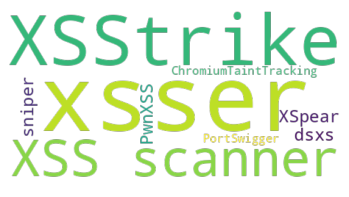

In [188]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df = pd.read_csv('results.csv')
data = df['Tool name'].value_counts().to_dict()
data['PortSwigger'] = 1
wc = WordCloud(max_font_size=150, mode = "RGBA", background_color=None, width = 550, height=300, margin=2).generate_from_frequencies(data)

plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [189]:
type_result_csv = pd.read_csv('results_type.csv', index_col=0)
type_result_csv.head(10)

DOM low DOM medium   DOM high REFLECTED low  \
Tool name                                                              
xsser                  Undefined  Undefined  Undefined     Undefined   
XSStrike                     DOM        DOM        DOM     REFLECTED   
XSS scanner            Undefined  Undefined  Undefined     Undefined   
XSpear                 Undefined  Undefined  Undefined     Undefined   
dsxs                   Undefined  Undefined  Undefined     Undefined   
sniper                 Undefined  Undefined  Undefined     Undefined   
PwnXSS                 Undefined  Undefined  Undefined     Undefined   
ChromiumTaintTracking  Undefined  Undefined  Undefined     Undefined   

                      REFLECTED medium REFLECTED high STORED low  \
Tool name                                                          
xsser                        Undefined      Undefined  Undefined   
XSStrike                     REFLECTED      REFLECTED  Undefined   
XSS scanner                  Undefined      Undefined  Undefined   
XSpear                       Undefined      Undefined  Undefined   
dsxs                         Undefined      Undefined  Undefined   
sniper                       Undefined      Undefined  Undefined   
PwnXSS                       Undefined      Undefined  Undefined   
ChromiumTaintTracking        Undefined      Undefined  Undefined   

                      STORED medium STORED high  
Tool name                                        
xsser                     Undefined   Undefined  
XSStrike                  Undefined   Undefined  
XSS scanner               Undefined   Undefined  
XSpear                    Undefined   Undefined  
dsxs                      Undefined   Undefined  
sniper                    Undefined   Undefined  
PwnXSS                    Undefined   Undefined  
ChromiumTaintTracking     Undefined   Undefined

# Detect Vulnerability Type

In [190]:
build_df = type_result_csv[type_result_csv['DOM low'] != 'Undefined']
build_df.head(10)

DOM low DOM medium DOM high REFLECTED low REFLECTED medium  \
Tool name                                                              
XSStrike      DOM        DOM      DOM     REFLECTED        REFLECTED   

          REFLECTED high STORED low STORED medium STORED high  
Tool name                                                      
XSStrike       REFLECTED  Undefined     Undefined   Undefined